# Diagrama de dispersão

Uma das atividades mais frequentes em análise de dados é a veriﬁcação da existência de relacionamento entre variáveis quantitativas. O diagrama de dispersão é o gráﬁco indicado para esta ﬁnalidade. Em geral, quando se utiliza um diagrama de dispersão, procura-se por padrões como os mostrados na figura a seguir:

![](figuras/diag-dispersao.png)
Fonte: Livro [**Data Points: Visualization That Means Something**](https://www.amazon.com/Data-Points-Visualization-Means-Something/dp/111846219X) de Natan Yau

</br>

Caso haja interese em se conhecer a relação entre o salário recebido por uma pessoa e a quantidade de anos de estudo que esta pessoa possui, um diagrama de dispersão mostrando a relação entre estas duas variáveis pode ser de grande ajuda. 

Considerando o conjunto de dados `rh.RData`,que contém dados relativos aos funcionários de uma empresa, as variáveis cujo relacionamento tem-se interesse em avaliara são `Anos.de.estudo` e `Salário`. 

A importação dos dados pode ser feita da seguint forma:

In [2]:
setwd("C:\\Users\\Marcos\\Documents\\GitHub\\Usando-R-em-Auditoria\\dados")
load("rh.RData")
head(rh)

Sexo,Estado.Civil,Anos.de.estudo,Formação,Tempo.de.empresa,Unidade,Departamento,Cargo,Salário,Bônus
Masculino,Casado,14,SEC,19,Curitiba,Produção,Assistente,16.67,28.02
Masculino,Viúvo,19,SEC,31,São Paulo,Vendas,Assistente,29.13,41.24
Feminino,Casado,18,SEC,28,Rio de Janeiro,Financeiro,Assistente,21.80,16.88
Feminino,Casado,16,SEC,20,Rio de Janeiro,Vendas,Assistente,22.61,13.50
Masculino,Solteiro,15,SEC,15,Curitiba,Vendas,Auxiliar,16.67,8.44
Masculino,Casado,18,SEC,23,São Paulo,Pessoal,Assistente,8.34,86.88


Para a contrução do diagrama de dispersão utiliza-se a função `plot()`. Considerando que este conjunto de dados possui uma grande quantidade de observações (5.000) será retirada uma amostra de 100 observações para a elaboração do gráfico. 



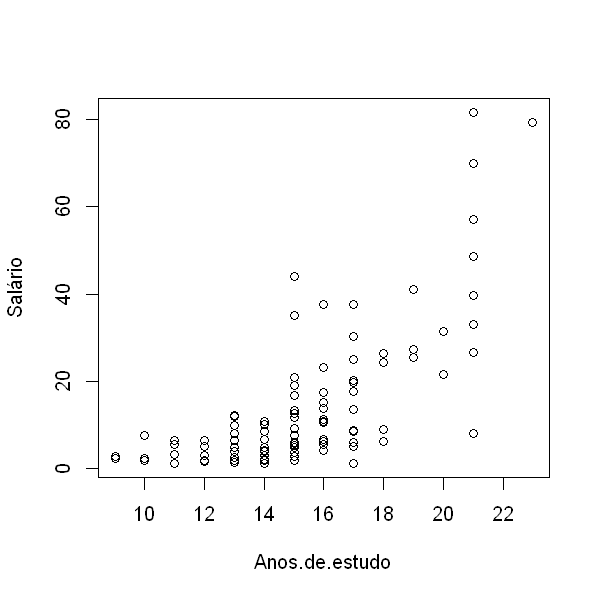

In [4]:
# Sorteio da amostra
set.seed(10)
rh_amostra <- rh[sample(row.names(rh), 100),]

# Elaboração do Gráfico
options(repr.plot.width = 5, repr.plot.height = 5) 
plot(Salário ~ Anos.de.estudo, data=rh_amostra)

O gráfico acima mostra a relação entre `Salário` e `Anos.de.estudo` para uma amostra dos funcionários da empresa. Mas será que o padrão evidenciado acima se repete se fossem considerados separadamente os dados dos funcionários do sexo masculino e feminino?

Uma forma de tentar visualizar estas duas categorias no gráfico é atribuir cores diferentes aos pontos do gráfico que representam dados de funcionários do sexo masculino e feminino. Por exemplo, o gráfico a seguir utiliza cores (azul = homens, verde = mulheres) para evidenciar os sexos.

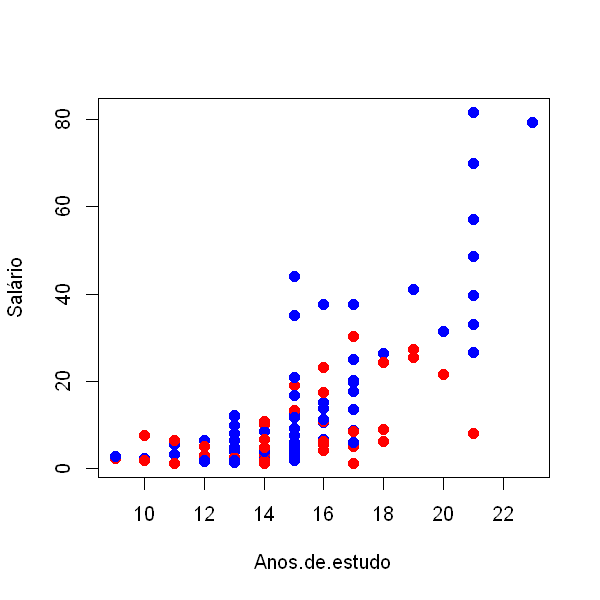

In [5]:
cores <- ifelse(rh_amostra$Sexo == 'Masculino', 'blue', 'red')
plot(Salário ~ Anos.de.estudo, data=rh_amostra, col=cores, pch=16, cex=1.2)

Também seria possível utilizar o formato do marcador (parâmetro **`pch=`**) para distinguir entre homens e mulheres.

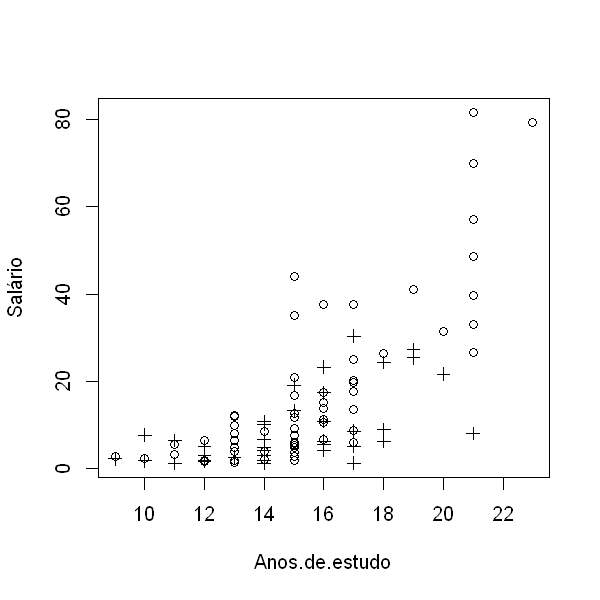

In [6]:
simbolo <- ifelse(rh_amostra$Sexo == 'Masculino', 1, 3)
plot(Salário ~ Anos.de.estudo, data=rh_amostra, pch=simbolo)

As duas abordagens não parecem resolver de forma efetiva o problema. Em ambos os casos a sobreposição dos pontos no gráfico dificulta bastante a visualização. Em situações como essa, os **gráficos condicionados** podem ser bastante úteis. No exemplo a seguir utilizaremos o pacote `lattice` para realizar diagramas de dispersão **condiciondos** à variável `Sexo`.

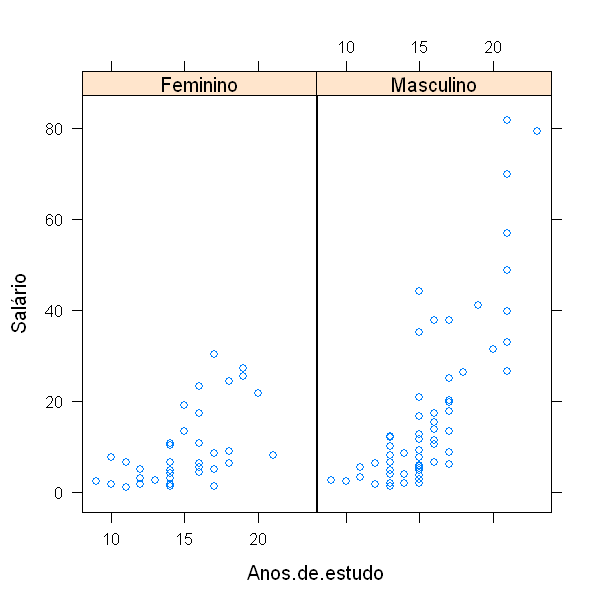

In [7]:
library(lattice)
xyplot(Salário ~ Anos.de.estudo | Sexo, data=rh_amostra)

A abordagem acima é mais efetiva do que as que foram feitas anteriormente.

**Marcos F Silva**